# Vehicle Number Plate Detection - Deep Learning Technology (Computer Vision)

## Problem Statement   -

### Automatic vehicle license plate detection and recognition is a key technique in most traffic-related applications and is an active research topic in the image processing domain. As a result, different methods, techniques and algorithms have been developed for license plate detection and recognition.

## Importing the Required Packages :-

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import os
import sys
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Loading the Image of Vehicle :-

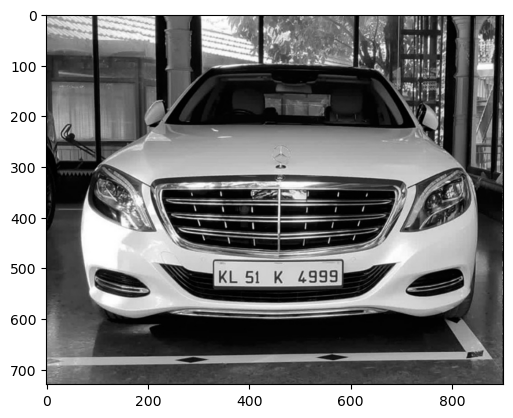

In [2]:
import easyocr
img = cv2.imread(sys.path[0]+'/blog2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

## Apply Filter and Edge detection :-

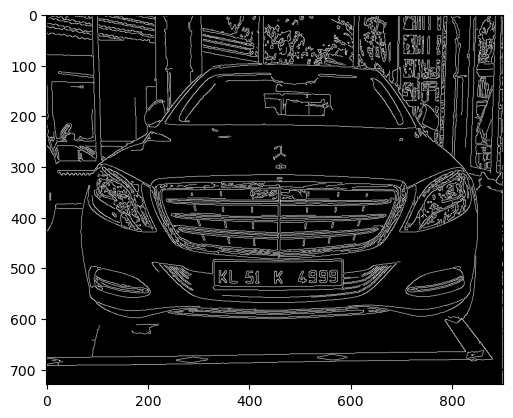

In [3]:
bfiller = cv2.bilateralFilter(gray, 11, 17, 17) # Noise Reduction
edged = cv2.Canny(bfiller, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Find Contours and apply mask :-

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
loaction = None

for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [6]:
location

array([[[331, 489]],

       [[332, 535]],

       [[583, 533]],

       [[582, 486]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

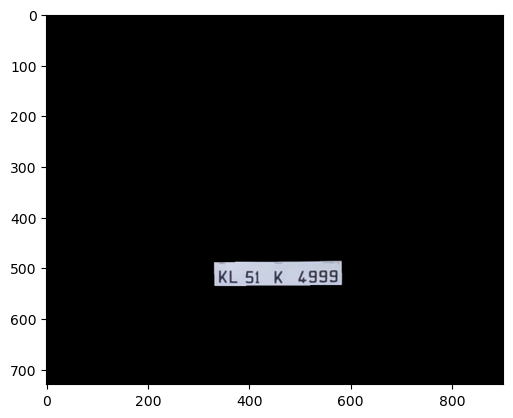

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

## Extracting the final Data of Vehicle Number Plate :-

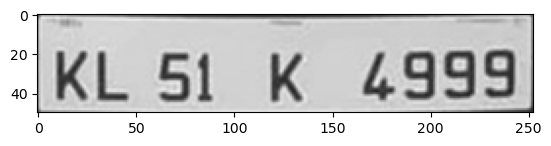

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))